<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220921_Next_Word_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import pickle
import heapq

In [3]:
path = '/content/drive/MyDrive/Ironhack/DBs/1661-0.txt'
text = open(path).read().lower()
print('corpus length: ', len(text))

corpus length:  581888


In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [5]:
unique_words = np.unique(words)
unique_word_index = dict((c,i) for i, c in enumerate(unique_words))
unique_word_index

{'0': 0,
 '000': 1,
 '1': 2,
 '10': 3,
 '100': 4,
 '1000': 5,
 '10_s_': 6,
 '10th': 7,
 '11': 8,
 '117': 9,
 '120': 10,
 '12_s_': 11,
 '12th': 12,
 '14': 13,
 '140': 14,
 '15': 15,
 '150': 16,
 '1500': 17,
 '1661': 18,
 '16a': 19,
 '17': 20,
 '1846': 21,
 '1858': 22,
 '1869': 23,
 '1870': 24,
 '1878': 25,
 '1883': 26,
 '1884': 27,
 '1887': 28,
 '1888': 29,
 '1890': 30,
 '19th': 31,
 '1_s_': 32,
 '2': 33,
 '20': 34,
 '200': 35,
 '2001': 36,
 '2002': 37,
 '2019': 38,
 '220': 39,
 '221b': 40,
 '226': 41,
 '22nd': 42,
 '249': 43,
 '25': 44,
 '250': 45,
 '26': 46,
 '26_s_': 47,
 '27': 48,
 '270': 49,
 '29': 50,
 '2_s_': 51,
 '2nd': 52,
 '3': 53,
 '30': 54,
 '31': 55,
 '35': 56,
 '3rd': 57,
 '4': 58,
 '40': 59,
 '4000': 60,
 '421': 61,
 '4700': 62,
 '4_d_': 63,
 '4th': 64,
 '4½': 65,
 '5': 66,
 '50': 67,
 '501': 68,
 '596': 69,
 '6': 70,
 '60': 71,
 '6221541': 72,
 '64': 73,
 '6_d_': 74,
 '7': 75,
 '700': 76,
 '750': 77,
 '750175': 78,
 '77': 79,
 '7_s_': 80,
 '7th': 81,
 '8': 82,
 '801': 83

In [6]:
word_length = 5
prev_words = []
next_words = []
for i in range(len(words) - word_length):
  prev_words.append(words[i:i + word_length])
  next_words.append(words[i + word_length])

print(prev_words[0], next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures'] of


In [7]:
X = np.zeros((len(prev_words), word_length, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i,j,unique_word_index[each_word]] = 1
    Y[i,unique_word_index[next_words[i]]] = 1

In [8]:
print(X[0][0])

[False False False ... False False False]


In [9]:
model = Sequential()
model.add(LSTM(128, input_shape=(word_length, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [10]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


811/811 [==============================] - 273s 334ms/step - loss: 6.0140 - accuracy: 0.1068 - val_loss: 7.1534 - val_accuracy: 0.0987
Epoch 2/2
811/811 [==============================] - 251s 310ms/step - loss: 5.7717 - accuracy: 0.1472 - val_loss: 7.9918 - val_accuracy: 0.1023


In [12]:
history

{'loss': [6.013977527618408, 5.771740436553955],
 'accuracy': [0.10676664113998413, 0.1472257822751999],
 'val_loss': [7.153421401977539, 7.991816520690918],
 'val_accuracy': [0.09868180006742477, 0.10234346240758896]}

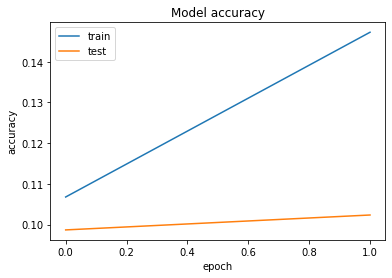

In [13]:
plt.plot(history['accuracy'])
plt.plot(history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

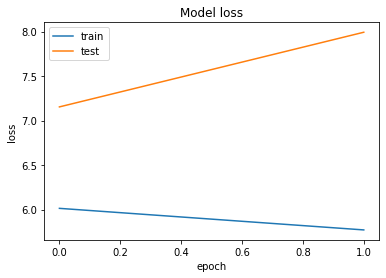

In [14]:
plt.plot(history['loss'])
plt.plot(history["val_loss"])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
def prepare_input_again(text):
    x = np.zeros((1, word_length, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input_again("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [16]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [29]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input_again(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char

        if len(original_text + completion) + 2 > len(original_text) and next_char == " ":
            return completion

In [30]:
def predict_completions(text, n=3):
    x = prepare_input_again(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [31]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [32]:
for q in quotes:
  seq = q[:40].lower()
  print(seq)
  print(predict_completions(seq))
  print()

it is not a lack of love, but a lack of 
it
is
not
a
lack
of


IndexError: ignored

In [ ]:
## Does not run, something with the indices_char. I could not figure it out